#load dataset

In [1]:
#import libraries 
import pandas as pd
!pip install -q kaggle
! mkdir ~/.kaggle #install kaggle
! cp kaggle.json ~/.kaggle/ #copy kaggle.json to new dir
! chmod 600 ~/.kaggle/kaggle.json #allocate the required permission

In [2]:
! kaggle datasets download uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 5.64MB/s]


In [3]:
! unzip iris.zip


Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [4]:
data = pd.read_csv('./Iris.csv')

In [5]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.shape

(150, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data = data.drop('Id', axis = 1);

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualize data

In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

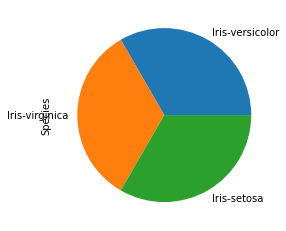

In [13]:
data["Species"].value_counts().plot(kind="pie")

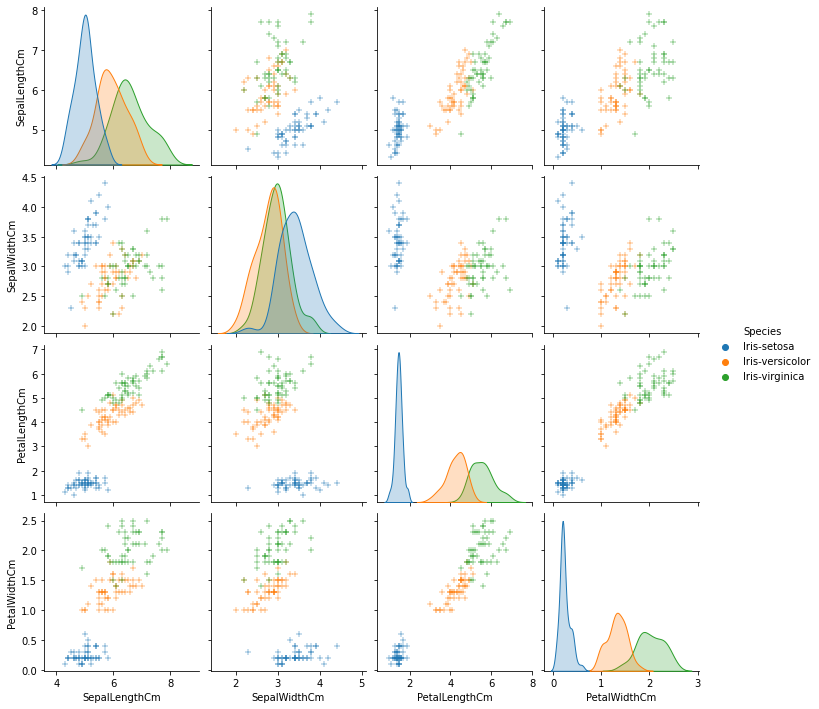

In [14]:
all_features = sns.pairplot(data, hue='Species', markers='+')
plt.show()

Here it can be seen the three can't be differentiated in the case of sepal width and sepal length.

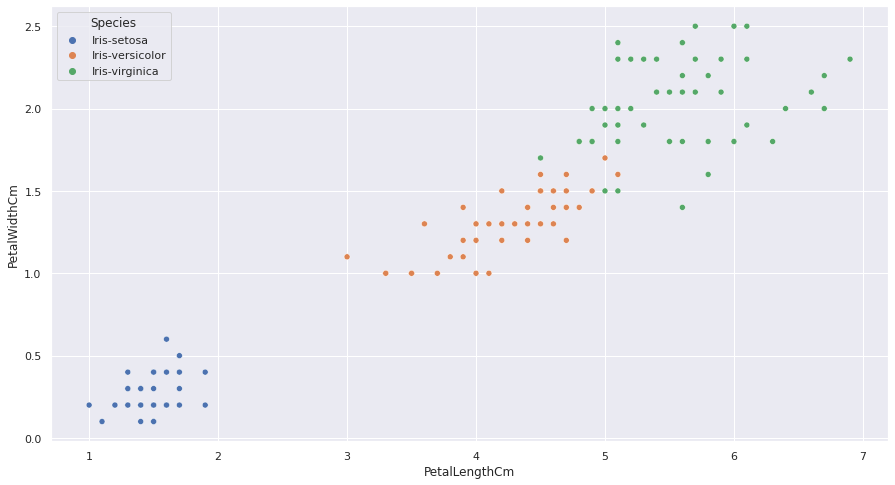

In [15]:
plt.figure(figsize = (15,8))
sns.set(style="darkgrid")
sns.scatterplot(data=data,x="PetalLengthCm",y='PetalWidthCm',hue="Species")
plt.show()

This plot clearly shows that Iris-setosa species is easy to identify whereas the other 2 are mostly similar in nature.

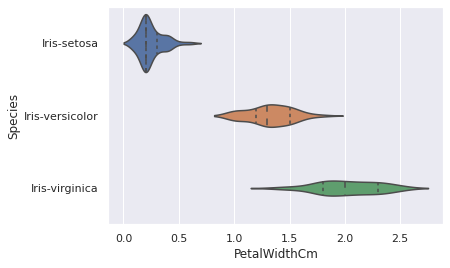

In [16]:
sns.violinplot(x='PetalWidthCm',y='Species',data=data,inner="quartile")
plt.show()

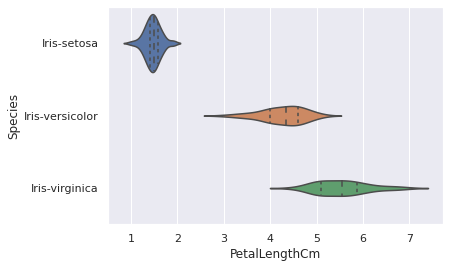

In [17]:
sns.violinplot(x='PetalLengthCm',y='Species', data=data, inner='quartile')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score                          
from sklearn.metrics import classification_report 
from sklearn import tree  

In [19]:
data = data.replace(to_replace ="Iris-setosa",value ="0") 
data = data.replace(to_replace ="Iris-versicolor",value ="1") 
data = data.replace(to_replace ="Iris-virginica",value ="2") 

In [20]:
X = np.array(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) 
Y = np.array(data["Species"]) 

##Training KNN

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=500)

In [24]:
classifier=KNeighborsClassifier(n_neighbors =5, metric="minkowski",p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred)*100) 
print(classification_report(Y_test,y_pred))

Accuracy :  97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



##Training decision tree

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 100) 

using gini index

In [28]:
using_gini = DecisionTreeClassifier(criterion = "gini",max_depth = 5,min_samples_leaf = 3,random_state = 100)

In [29]:
using_gini.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

using entropy

In [30]:
using_entropy = DecisionTreeClassifier(criterion = "entropy",max_depth = 5,min_samples_leaf = 3,random_state = 100)

In [31]:
using_entropy.fit(X_train, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [32]:
y_pred_gini = using_gini.predict(X_test) 

In [35]:
text_representation = tree.export_text(using_gini)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



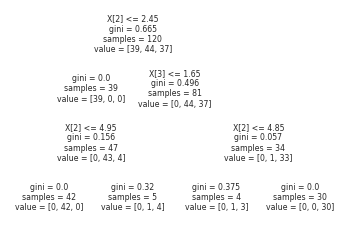

In [34]:
tree.plot_tree(using_gini)
plt.show()

In [36]:
print ("Accuracy : ", accuracy_score(Y_test,y_pred_gini)*100) 
print ("Report : ",  classification_report(Y_test, y_pred_gini))

Accuracy :  96.66666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
y_pred_entropy = using_entropy.predict(X_test)

In [38]:
text_representation = tree.export_text(using_entropy)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



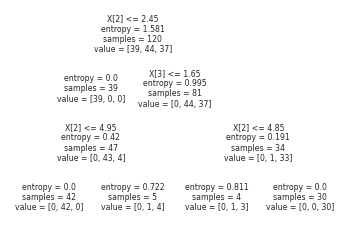

In [39]:
tree.plot_tree(using_entropy)
plt.show()

In [40]:
print ("Accuracy:", accuracy_score(Y_test,y_pred_entropy)*100)
print ("Report:",  classification_report(Y_test, y_pred_entropy))

Accuracy: 96.66666666666667
Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

